In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install dowhy
import dowhy

In [ ]:
!pip uninstall wheel -y
!pip install wheel
!pip install graphviz
!apt install libgraphviz-dev
!pip install pygraphviz

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
churn = pd.read_excel('/content/drive/MyDrive/Telecommunications_Industry/Telco_customer_churn.xlsx')
demo = pd.read_excel('/content/drive/MyDrive/Telecommunications_Industry/Telco_customer_churn_demographics.xlsx')
loc = pd.read_excel('/content/drive/MyDrive/Telecommunications_Industry/Telco_customer_churn_location.xlsx')
pop = pd.read_excel('/content/drive/MyDrive/Telecommunications_Industry/Telco_customer_churn_population.xlsx')
services = pd.read_excel('/content/drive/MyDrive/Telecommunications_Industry/Telco_customer_churn_services.xlsx')
stat = pd.read_excel('/content/drive/MyDrive/Telecommunications_Industry/Telco_customer_churn_status.xlsx')

In [ ]:
data = pd.merge(churn, demo[list(set(demo.columns) - set(churn.columns))], how='inner', left_on='CustomerID', right_on='Customer ID')
data = pd.merge(data, pop[['Zip Code', 'Population']], how='inner', left_on='Zip Code', right_on='Zip Code')
cols = list(set(services.columns) - set(data.columns)) + ['Customer ID']
data = pd.merge(data, services[cols], how='inner', left_on='Customer ID', right_on='Customer ID')
data = data.drop(['Tenure in Months', 'Customer ID'], axis=1)

In [ ]:
## Drop rows from 'Total Charges' features which have empty string value
data.drop(data[data['Total Charges'].apply(lambda x: isinstance(x, str))].index, inplace=True)

## Change data type of 'Total Charges' feature
data['Total Charges'] = data['Total Charges'].astype('float64')

cols = []
for column in data.columns:
  cols += [column.replace(" ", "_")]
data.columns = cols

In [ ]:
data.columns

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip_Code',
       'Lat_Long', 'Latitude', 'Longitude', 'Gender', 'Senior_Citizen',
       'Partner', 'Dependents', 'Tenure_Months', 'Phone_Service',
       'Multiple_Lines', 'Internet_Service', 'Online_Security',
       'Online_Backup', 'Device_Protection', 'Tech_Support', 'Streaming_TV',
       'Streaming_Movies', 'Contract', 'Paperless_Billing', 'Payment_Method',
       'Monthly_Charges', 'Total_Charges', 'Churn_Label', 'Churn_Value',
       'Churn_Score', 'CLTV', 'Churn_Reason', 'Married',
       'Number_of_Dependents', 'Age', 'Under_30', 'Population', 'Service_ID',
       'Total_Extra_Data_Charges', 'Total_Long_Distance_Charges',
       'Internet_Type', 'Avg_Monthly_GB_Download', 'Referred_a_Friend',
       'Offer', 'Number_of_Referrals', 'Total_Revenue',
       'Device_Protection_Plan', 'Quarter',
       'Avg_Monthly_Long_Distance_Charges', 'Streaming_Music', 'Total_Refunds',
       'Monthly_Charge', 'Unlimited_Data', 'Pre

In [ ]:
cols = ['Gender', 'Senior_Citizen',\
       'Partner', 'Dependents', 'Tenure_Months', 'Phone_Service',\
       'Multiple_Lines', 'Internet_Service', 'Online_Security',\
       'Online_Backup', 'Device_Protection', 'Tech_Support', 'Streaming_TV',\
       'Streaming_Movies', 'Contract', 'Paperless_Billing', 'Payment_Method',\
       'Monthly_Charges', 'Total_Charges',  'Churn_Value', 'CLTV', 'Married', 'Under_30', 'Age',\
       'Number_of_Dependents', 'Population', 'Total_Long_Distance_Charges',\
       'Unlimited_Data', 'Offer', 'Premium_Tech_Support', 'Total_Refunds',\
       'Avg_Monthly_GB_Download', 'Monthly_Charge',\
       'Referred_a_Friend', 'Number_of_Referrals', 'Total_Extra_Data_Charges',\
       'Internet_Type', 'Device_Protection_Plan', 'Quarter', 'Total_Revenue',\
       'Avg_Monthly_Long_Distance_Charges', 'Streaming_Music']

In [ ]:
def get_causal_estimate(data, causal_graph, treatment="Offer", outcome = "Churn_Value", draw_graph=False):

  model = dowhy.CausalModel(
      data = offer_data,
      graph = causal_graph.replace("\n", " "),
      treatment = treatment,
      outcome = outcome
  )

  if draw_graph:
    model.view_model(size=(55, 32))

  identified_estimand = model.identify_effect()

  estimate = model.estimate_effect(identified_estimand, method_name="backdoor.propensity_score_matching", target_units="atc")
  effect = str(estimate).split('## Estimate')[-1].strip('\n')

  return effect, model, identified_estimand, estimate

In [ ]:
cols = ['Gender', 'Senior_Citizen',\
       'Partner', 'Dependents', 'Tenure_Months', 'Phone_Service',\
       'Multiple_Lines', 'Internet_Service', 'Online_Security',\
       'Online_Backup', 'Device_Protection', 'Tech_Support', 'Streaming_TV',\
       'Streaming_Movies', 'Contract', 'Paperless_Billing', 'Payment_Method',\
       'Monthly_Charges', 'Total_Charges',  'Churn_Value', 'CLTV', 'Married', 'Under_30', 'Age',\
       'Number_of_Dependents', 'Population', 'Total_Long_Distance_Charges',\
       'Unlimited_Data', 'Offer', 'Premium_Tech_Support', 'Total_Refunds',\
       'Avg_Monthly_GB_Download', 'Monthly_Charge',\
       'Referred_a_Friend', 'Number_of_Referrals', 'Total_Extra_Data_Charges',\
       'Internet_Type', 'Device_Protection_Plan', 'Quarter', 'Total_Revenue',\
       'Avg_Monthly_Long_Distance_Charges', 'Streaming_Music']

In [ ]:
import pygraphviz
causal_graph = """digraph{
Offer -> Churn_Value;
Zip_Code -> Premium_Tech_Support;
Zip_Code -> Churn_Value;
Number_of_Dependents -> Premium_Tech_Support;
Number_of_Dependents -> Churn_Value;
Age -> Number_of_Dependents;
Married -> Number_of_Dependents;
Avg_Monthly_GB_Download -> Offer;
Total_Long_Distance_Charges -> Churn_Value;
Total_Extra_Data_Charges -> Churn_Value;
Internet_Type -> Churn_Value;
Internet_Type -> Premium_Tech_Support;
Total_Revenue -> Offer;
Total_Charges -> Offer;
Monthly_Charges -> Total_Charges;
Offer -> Premium_Tech_Support;
Premium_Tech_Support -> Churn_Value;
U -> Churn_Value;
U -> Total_Charges;
U -> Total_Extra_Data_Charges;
U -> Total_Long_Distance_Charges;
Tenure_Months -> Churn_Value;
Tenure_Months -> Premium_Tech_Support;
}"""

In [ ]:
causal_graph_2 = """digraph{
Offer;
Churn_Value;
Age;
Married;
Number_of_Dependents;
Total_Charges;
Monthly_Charges;
Streaming_Music;
Streaming_Movies;
Avg_Monthly_GB_Download;
Internet_Type;
U;
Total_Extra_Data_Charges;
Avg_Monthly_Long_Distance_Charges;
Unlimited_Data;
Zip_Code -> Offer;
Zip_Code -> Churn_Value;
Offer -> Churn_Value;
Monthly_Charges -> Offer;
Married -> Number_of_Dependents;
Age -> Number_of_Dependents;
Number_of_Dependents -> Churn_Value;
Number_of_Dependents -> Offer;
Total_Charges -> Offer;
Total_Charges -> Churn_Value;
Monthly_Charges -> Offer;
Monthly_Charges -> Churn_Value;
Unlimited_Data -> Offer;
Unlimited_Data -> Churn_Value;
Total_Extra_Data_Charges -> Churn_Value;
Streaming_Music -> Avg_Monthly_GB_Download;
Avg_Monthly_GB_Download -> Churn_Value;
Streaming_Movies -> Avg_Monthly_GB_Download;
Internet_Type -> Avg_Monthly_GB_Download;
Internet_Type -> Churn_Value;
Avg_Monthly_Long_Distance_Charges -> Churn_Value;
U -> Churn_Value;
U -> Total_Extra_Data_Charges;
U -> Total_Charges;
U -> Avg_Monthly_GB_Download;
Avg_Monthly_GB_Download -> Offer;
}"""

/usr/local/lib/python3.10/dist-packages/dowhy/causal_model.py:557: UserWarning: 1 variables are assumed unobserved because they are not in the dataset. Configure the logging level to `logging.WARNING` or higher for additional details.
  warnings.warn(


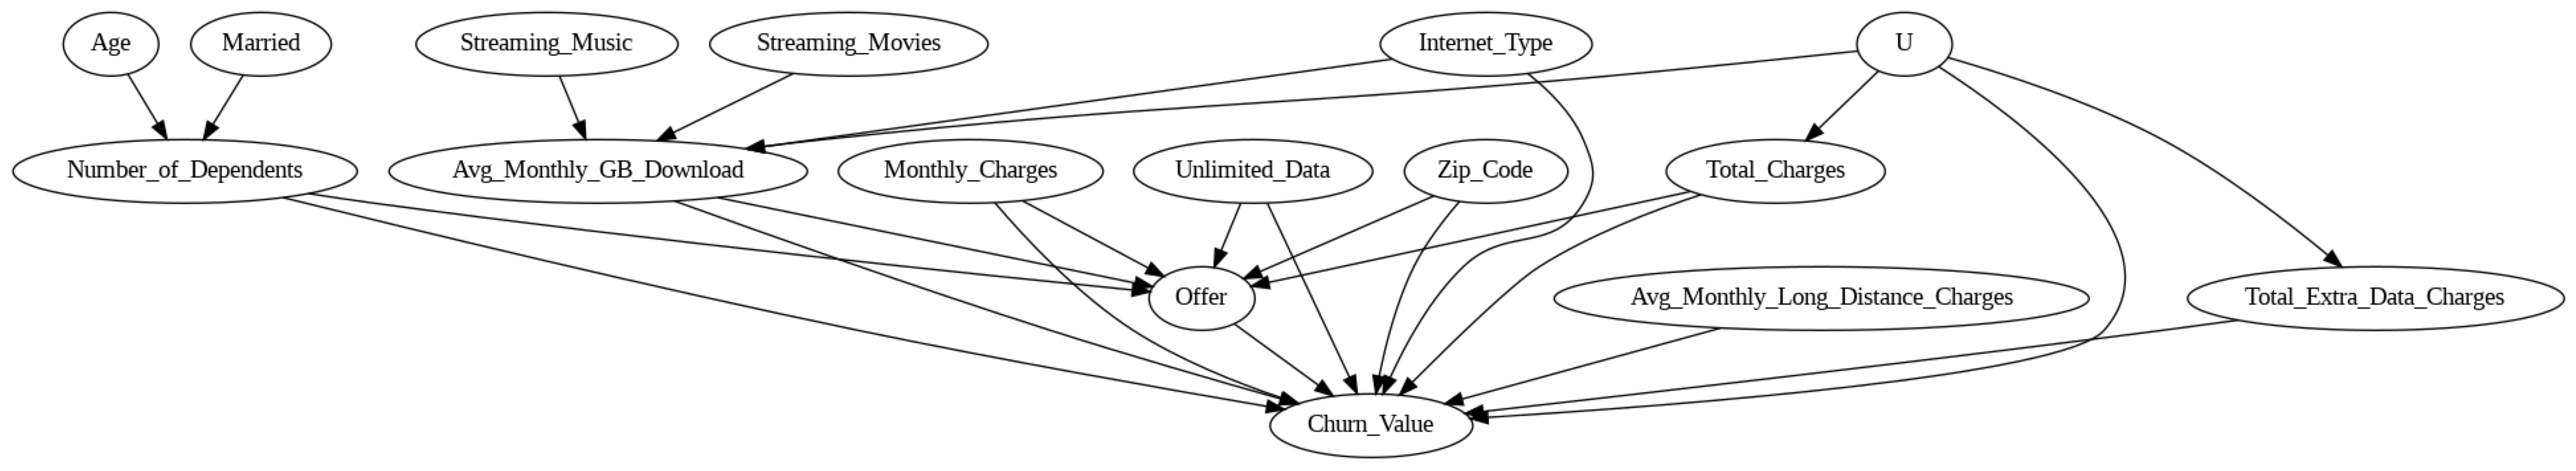


Mean value: -0.2671990171990172


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

offer_data = data.copy()

# # Checking relation for low tenure customers
# offer_data = offer_data[offer_data.Tenure_Months <= 22]

offer_data.loc[offer_data['Offer']!='Offer A', 'Offer'] = 0
offer_data.loc[offer_data['Offer']=='Offer A', 'Offer'] = 1

offer_data = offer_data[cols].apply(LabelEncoder().fit_transform)
offer_data['Zip_Code'] = data['Zip_Code']


effect, model, identified_estimand, estimate = get_causal_estimate(offer_data, causal_graph, draw_graph=True)

print(f'\n{effect}')

In [ ]:
refute_res1 = model.refute_estimate(identified_estimand, estimate, method_name="random_common_cause")
print(refute_res1)

In [ ]:
refute_res2 = model.refute_estimate(identified_estimand, estimate, method_name="placebo_treatment_refuter")
print(refute_res2)

Refute: Use a Placebo Treatment
Estimated effect:-0.056490384615384616
New effect:0.005811273663125382
p value:0.6799999999999999



In [ ]:
refute_res3 = model.refute_estimate(identified_estimand, estimate, method_name="data_subset_refuter")
print(refute_res3)